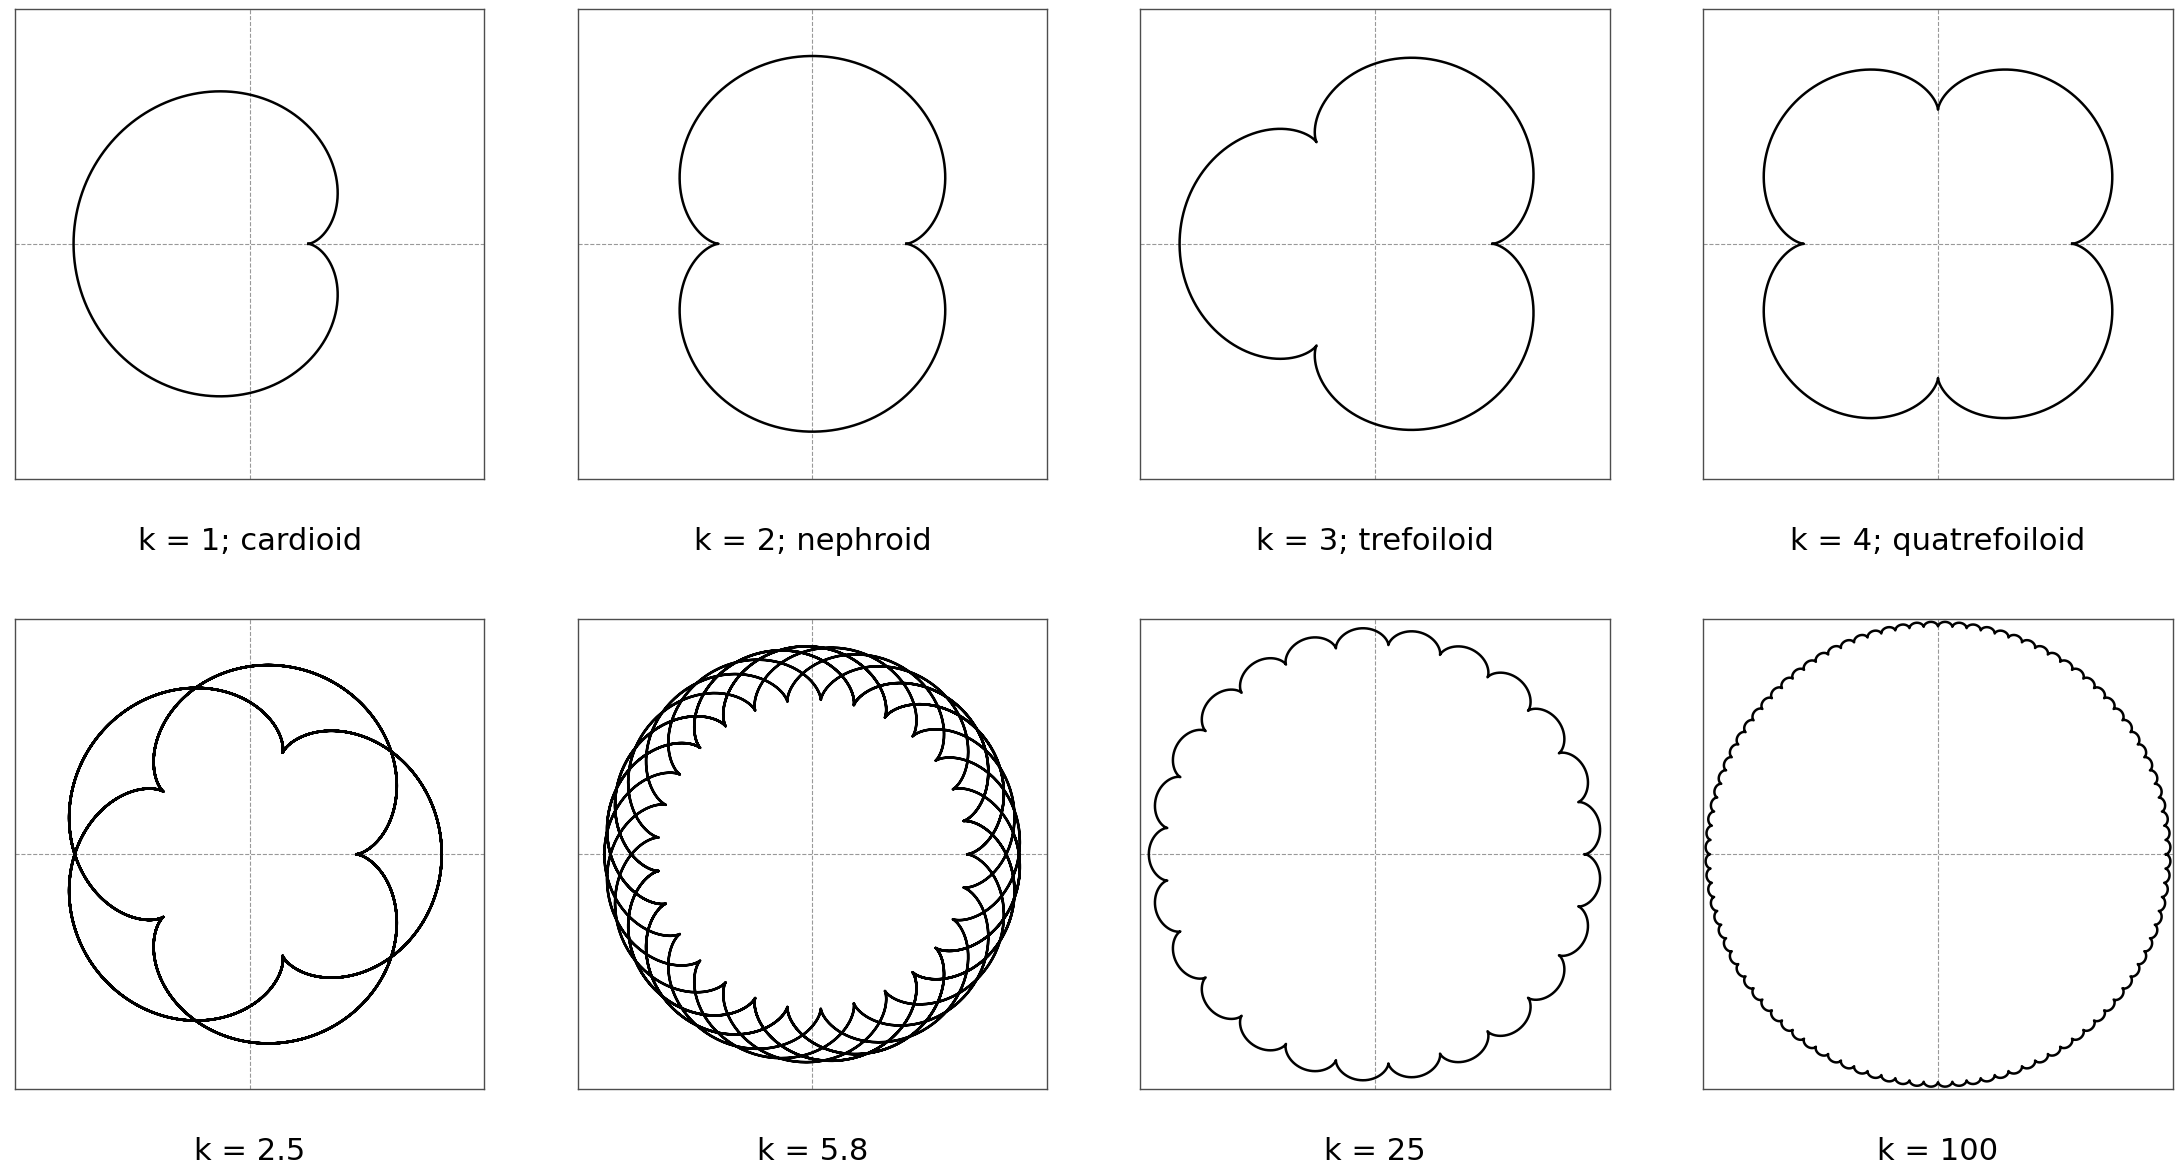

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def epicycloid_xy(k, num_points=2400, turns=1.0):
    r = 1.0
    R = k * r
    w = (R + r) / r
    t = np.linspace(0, 2 * np.pi * turns, num_points)
    x = (R + r) * np.cos(t) - r * np.cos(w * t)
    y = (R + r) * np.sin(t) - r * np.sin(w * t)
    return x, y

def plot_panel(ax, k, subtitle=None):
    turns = 1.0 if abs(k - round(k)) < 1e-9 else 12.0
    x, y = epicycloid_xy(k, num_points=4000, turns=turns)
    ax.axhline(0, color='0.6', lw=0.8, ls='--')
    ax.axvline(0, color='0.6', lw=0.8, ls='--')
    ax.plot(x, y, color='black', lw=1.8)
    ax.set_aspect('equal', 'box')
    lim = k + 3.0
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_xticks([]); ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_linewidth(1.0)
        spine.set_color('0.3')
    if subtitle:
        ax.text(0.5, -0.10, subtitle, transform=ax.transAxes,
                ha='center', va='top', fontsize=22)

# Parameters
k_list = [1, 2, 3, 4, 2.5, 5.8, 25, 100]
subs = ["k = 1; cardioid",
        "k = 2; nephroid",
        "k = 3; trefoiloid",
        "k = 4; quatrefoiloid",
        "k = 2.5",
        "k = 5.8",
        "k = 25",
        "k = 100"]

# Make subplot areas bigger
fig, axes = plt.subplots(2, 4, figsize=(22, 12))  # Bigger figure = bigger boxes
axes = axes.ravel()

for i in range(len(k_list)):
    plot_panel(axes[i], k_list[i], subtitle=subs[i])

# Make panels occupy more space
plt.subplots_adjust(left=0.00, right=1, top=1, bottom=0.1,
                    wspace=0.1, hspace=0.3)  # Smaller wspace/hspace = bigger boxes

# Show or save
plt.savefig("fig5.png", dpi=300, bbox_inches="tight")
plt.show()
